
# 🌳 Decision Tree & Random Forest

# 1. Decision Tree

![Capture.PNG](attachment:Capture.PNG)

Decision Trees are an important type of algorithm for predictive modeling machine learning.

The classical decision tree algorithms have been around for decades and modern variations like random forest are among the most powerful techniques available.

Classification and Regression Trees or `CART` for short is a term introduced by `Leo Breiman` to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “`decision trees`”, but on some platforms like R they are referred to by the more modern term CART.

The `CART` algorithm provides a foundation for important algorithms like `bagged decision trees`, `random forest` and `boosted decision trees`.

### CART Model Representation
The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a new input, the tree is traversed by evaluating the specific input started at the root node of the tree.

#### Some **advantages** of decision trees are:
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation.
* Able to handle both numerical and categorical data.
* Possible to validate a model using statistical tests.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

#### The **disadvantages** of decision trees include:
* Overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable. Mitigant: Use decision trees within an ensemble.
* Cannot guarantee to return the globally optimal decision tree. Mitigant: Training multiple trees in an ensemble learner
* Decision tree learners create biased trees if some classes dominate. Recommendation: Balance the dataset prior to fitting

# 2. Random Forest
Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.
![inbox_3363440_e322b7c76f2ca838ba3753e3c76c5efc_inbox_2301650_875af39bcc296f0a783519a400412dee_RF.jpg](attachment:inbox_3363440_e322b7c76f2ca838ba3753e3c76c5efc_inbox_2301650_875af39bcc296f0a783519a400412dee_RF.jpg)
To improve performance of Decision trees, we can use many trees with a random sample of features chosen as the split.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/MyDrive/Machine Learning 2025 NTI/Lab 8 Decision Tree & Random Forest

/content/drive/MyDrive/Machine Learning 2025 NTI/Lab 8 Decision Tree & Random Forest


https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners

# 3. Decision Tree & Random Forest Implementation in python

We will use Decision Tree & Random Forest in Predicting the attrition of your valuable employees.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [8]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

<Axes: xlabel='Attrition', ylabel='count'>

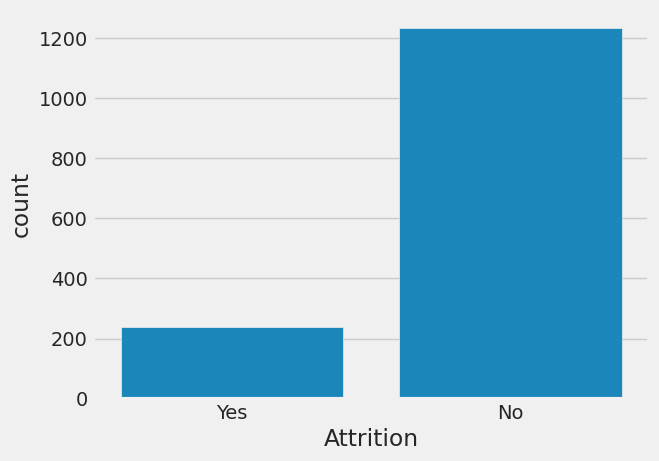

In [9]:
sns.countplot(x='Attrition', data=df)

In [10]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

In [13]:
df['Attrition']

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [14]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [15]:
print(df['Attrition'])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int8


# Data Processing

In [16]:
categorical_col.remove('Attrition')

In [17]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [19]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# prompt: need to balance the X_train and y_train using oversampling

#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(random_state=42)
#X_train, y_train = ros.fit_resample(X_train, y_train)


# Applying Tree & Random Forest algorithms

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Decision Tree Classifier

**Decision Tree parameters:**
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
_______________________________________________
Conf

## 2. Decision Tree Classifier Hyperparameter tuning

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    param_grid,
    scoring="accuracy",
    n_jobs=-1, # use all cores of the CPU
    verbose=1,  # print progress
    cv=5 #kfold count
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

best_DT=tree_cv.best_estimator_

print_score(best_DT, X_train, y_train, X_test, y_test, train=True)
print_score(best_DT, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2})
Train Result:
Accuracy Score: 85.52%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.862887    0.728814  0.855199     0.795850      0.839955
recall       0.981243    0.244318  0.855199     0.612780      0.855199
f1-score     0.918267    0.365957  0.855199     0.642112      0.823800
support    853.000000  176.000000  0.855199  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[837  16]
 [133  43]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870070   0.500000  0.861678    0.685035      0.818881
recall       0.986842   0.081967

### Visualization of a tree

In [25]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

In [28]:
tree_plot = DecisionTreeClassifier(random_state=42)
tree_plot.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

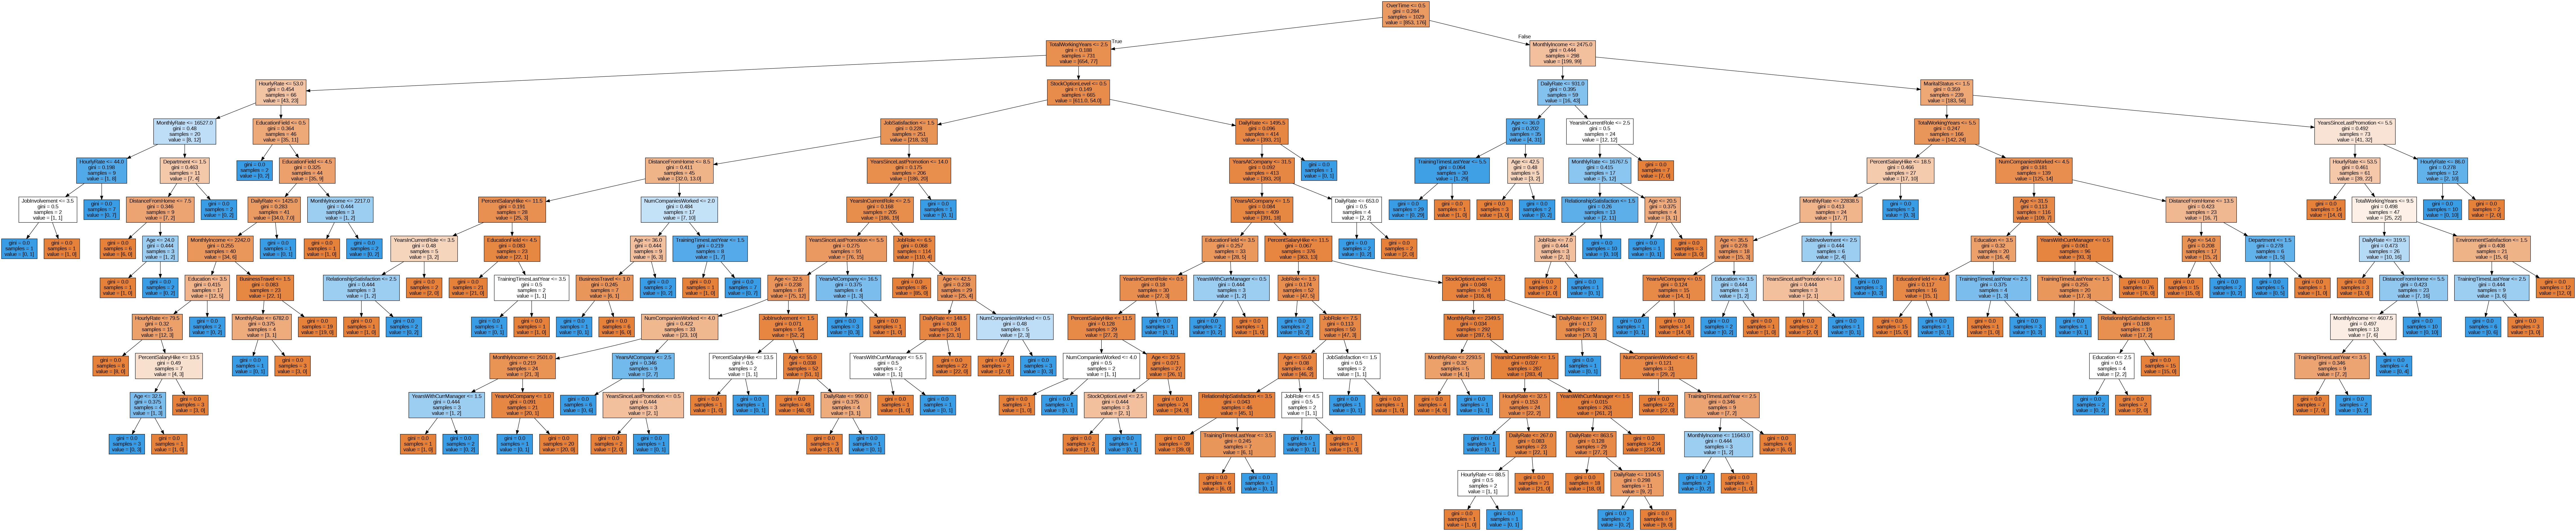

In [29]:
dot_data = StringIO()
export_graphviz(tree_plot, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# 3. Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- **Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
***
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.876168   0.615385  0.868481    0.745776      0.840096
recall       0.986842   0.131148  0.868481    0.558995      0.868481
f1-score     0.928218   0.216216  0.868481    0.572217      0.829732
support    380.000000  61.000000  0.868481  441.000000    441.000000
_______________________________________________
Conf

## 4. Random Forest hyperparameter tuning

### a) Randomized Search Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [3,5,8,15,20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] # 1000 record  = > 5 parts , every part 200 with replacement

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=200,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best paramters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True})
Train Result:
Accuracy Score: 99.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.988413    1.000000  0.990282     0.994206      0.990394
recall       1.000000    0.943182  0.990282     0.971591      0.990282
f1-score     0.994172    0.970760  0.990282     0.982466      0.990168
support    853.000000  176.000000  0.990282  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [ 10 166]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.872390   0.600000  0.866213    0.736195      0.834712
recall       0.989474   0.098361  0.866213    0.543917

`Random search` allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with `GridSearchCV`, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

### b) Grid Search Cross Validation

In [ ]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf,
    params_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1920 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Train Result:
Accuracy Score: 99.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.988413    1.000000  0.990282     0.994206      0.990394
recall       1.000000    0.943182  0.990282     0.971591      0.990282
f1-score     0.994172    0.970760  0.990282     0.982466      0.990168
support    853.000000  176.000000  0.990282  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [ 10 166]]

Test Result:
Accuracy Score: 86.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.874419   0.636364  0.868481    0.755391      0.841490
recall       0.989474   0.114754  0.868481    0.5521

# Summary
In this notebook we learned the following lessons:
- Decsion tree and random forest algorithms and the parameters of each algorithm.
- How to tune hyperparameters for both Decision tree and Random Forest.
- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant.
  - By sampling an equal number of samples from each class  
  - By normalizing the sum of the sample weights (sample_weight) for each class to the same value.

  
## References:
- [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [Bagging and Random Forest Ensemble Algorithms for Machine Learning](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)